# Question 1: What are the peak hours for commuters (morning and evening)? #

## Morning ##

In [4]:
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np

In [2]:
! bq query --use_legacy_sql=FALSE 'SELECT \
  FORMAT_TIMESTAMP("%H", \
    start_date) start_hour, \
  COUNT(*) num \
FROM \
  `bigquery-public-data.san_francisco.bikeshare_trips` \
GROUP BY \
  start_hour \
HAVING \
  CAST(start_hour as INT64) < 12 \
ORDER BY \
  num DESC \
LIMIT 3'

Waiting on bqjob_r69e673ffc98ce096_00000161b245863d_1 ... (0s) Current status: DONE   
+------------+--------+
| start_hour |  num   |
+------------+--------+
| 08         | 132464 |
| 09         |  96118 |
| 07         |  67531 |
+------------+--------+


In [3]:
! bq query --use_legacy_sql=FALSE --format=csv 'SELECT \
  FORMAT_TIMESTAMP("%H", \
    start_date) start_hour, \
  COUNT(*) num \
FROM \
  `bigquery-public-data.san_francisco.bikeshare_trips` \
GROUP BY \
  start_hour \
HAVING \
  CAST(start_hour as INT64) < 12 \
ORDER BY \
  start_hour ASC ' > q1_morning.csv

Waiting on bqjob_r3274d93ed442ca7d_00000161b2459265_1 ... (0s) Current status: DONE   

In [4]:
morning_peak_hours=pd.read_csv('q1_morning.csv')
morning_peak_hours.shape

(12, 2)

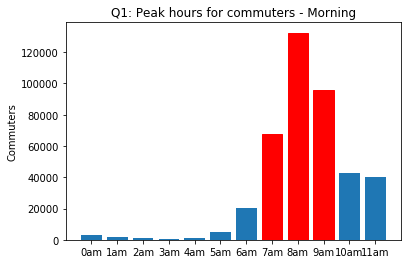

In [5]:
# Append am to all the hours
hours = morning_peak_hours['start_hour'].astype(str) + 'am'

bar_chart = plt.bar(morning_peak_hours['start_hour'], morning_peak_hours['num'])

# Change color for the peak hours
bar_chart[7].set_color('r')
bar_chart[8].set_color('r')
bar_chart[9].set_color('r')

plt.xticks(morning_peak_hours['start_hour'], hours)
plt.ylabel('Commuters')
plt.title('Q1: Peak hours for commuters - Morning')
plt.show()

## Evening ##

In [6]:
! bq query --use_legacy_sql=FALSE 'SELECT \
  FORMAT_TIMESTAMP("%H", \
    start_date) start_hour, \
  COUNT(*) num \
FROM \
  `bigquery-public-data.san_francisco.bikeshare_trips` \
GROUP BY \
  start_hour \
HAVING \
  CAST(start_hour as INT64) >= 12 \
ORDER BY \
  num DESC \
LIMIT 3'

Waiting on bqjob_r3fa35b0bdbcc2798_00000161b2459df9_1 ... (0s) Current status: DONE   
+------------+--------+
| start_hour |  num   |
+------------+--------+
| 17         | 126302 |
| 16         |  88755 |
| 18         |  84569 |
+------------+--------+


In [7]:
! bq query --use_legacy_sql=FALSE --format=csv 'SELECT \
  FORMAT_TIMESTAMP("%H", \
    start_date) start_hour, \
  COUNT(*) num \
FROM \
  `bigquery-public-data.san_francisco.bikeshare_trips` \
GROUP BY \
  start_hour \
HAVING \
  CAST(start_hour as INT64) >= 12 \
ORDER BY \
  start_hour ASC ' > q1_evening.csv

Waiting on bqjob_r1b069e9af4418d1c_00000161b245a947_1 ... (0s) Current status: DONE   

In [8]:
evening_peak_hours=pd.read_csv('q1_evening.csv')
evening_peak_hours.shape

(12, 2)

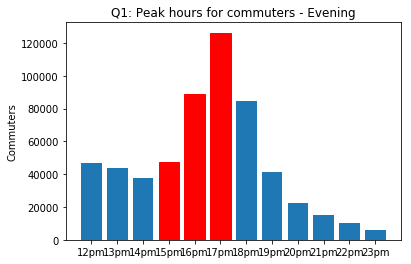

In [9]:
# Append pm to all the hours
hours = evening_peak_hours['start_hour'].astype(str) + 'pm' 

bar_chart = plt.bar(evening_peak_hours['start_hour'], evening_peak_hours['num'])

# Change color for the peak hours
bar_chart[3].set_color('r')
bar_chart[4].set_color('r')
bar_chart[5].set_color('r')

plt.xticks(evening_peak_hours['start_hour'], hours)
plt.ylabel('Commuters')
plt.title('Q1: Peak hours for commuters - Evening')
plt.show()

## Answer ##

The peak hours are:

* Morning: 7-10am
* Evening: 4-7pm

# Question 2: What is the most popular type of subscriber (subscriber vs customer) during the peak hours in Question 1? #

## Morning ##

In [10]:
! bq query --use_legacy_sql=FALSE 'SELECT \
  FORMAT_TIMESTAMP("%H", \
    start_date) start_hour, \
  subscriber_type, \
  COUNT(*) num \
FROM \
  `bigquery-public-data.san_francisco.bikeshare_trips` \
GROUP BY \
  start_hour, subscriber_type \
HAVING \
  CAST(start_hour as INT64) BETWEEN 7 AND 10 \
ORDER BY \
  num DESC'

Waiting on bqjob_r368bd1ebd22881fc_00000161b245b464_1 ... (0s) Current status: DONE   
+------------+-----------------+--------+
| start_hour | subscriber_type |  num   |
+------------+-----------------+--------+
| 08         | Subscriber      | 127171 |
| 09         | Subscriber      |  89546 |
| 07         | Subscriber      |  64946 |
| 10         | Subscriber      |  34532 |
| 10         | Customer        |   8250 |
| 09         | Customer        |   6572 |
| 08         | Customer        |   5293 |
| 07         | Customer        |   2585 |
+------------+-----------------+--------+


In [11]:
! bq query --use_legacy_sql=FALSE --format=csv 'SELECT \
  FORMAT_TIMESTAMP("%H", \
    start_date) start_hour, \
  subscriber_type, \
  COUNT(*) num \
FROM \
  `bigquery-public-data.san_francisco.bikeshare_trips` \
GROUP BY \
  start_hour, subscriber_type \
HAVING \
  CAST(start_hour as INT64) BETWEEN 7 AND 10 \
ORDER BY \
  start_hour ASC' > q2_morning.csv

Waiting on bqjob_r7f99d004f3ed1512_00000161b245bf20_1 ... (0s) Current status: DONE   

In [12]:
morning_subscribers=pd.read_csv('q2_morning.csv')
morning_subscribers.shape

(8, 3)

In [13]:
morning_subscribers

,start_hour,subscriber_type,num
0,7,Subscriber,64946
1,7,Customer,2585
2,8,Subscriber,127171
3,8,Customer,5293
4,9,Customer,6572
5,9,Subscriber,89546
6,10,Customer,8250
7,10,Subscriber,34532


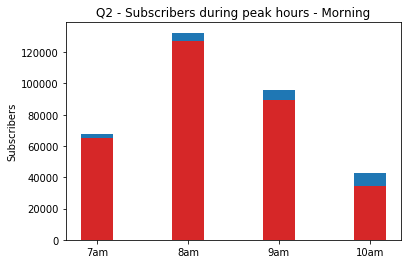

In [14]:
N = 4
# Append pm to all the hours
hours = morning_subscribers[morning_subscribers['subscriber_type'] == 'Subscriber']['start_hour'].astype(str) + 'am'
subscribers = morning_subscribers[morning_subscribers['subscriber_type'] == 'Subscriber']['num']
customers = morning_subscribers[morning_subscribers['subscriber_type'] == 'Customer']['num']
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, subscribers, width, color='#d62728')
p2 = plt.bar(ind, customers, width,
             bottom=subscribers)

plt.ylabel('Subscribers')
plt.title('Q2 - Subscribers during peak hours - Morning')
plt.xticks(ind, hours)

plt.show()

## Evening ##

In [15]:
! bq query --use_legacy_sql=FALSE 'SELECT \
  FORMAT_TIMESTAMP("%H", \
    start_date) start_hour, \
  subscriber_type, \
  COUNT(*) num \
FROM \
  `bigquery-public-data.san_francisco.bikeshare_trips` \
GROUP BY \
  start_hour, \
  subscriber_type \
HAVING \
  CAST(start_hour AS INT64) BETWEEN 16 AND 19 \
ORDER BY \
  num DESC'

Waiting on bqjob_r9981a486889bdc9_00000161b245cae4_1 ... (0s) Current status: DONE   
+------------+-----------------+--------+
| start_hour | subscriber_type |  num   |
+------------+-----------------+--------+
| 17         | Subscriber      | 114915 |
| 16         | Subscriber      |  76051 |
| 18         | Subscriber      |  75798 |
| 19         | Subscriber      |  35515 |
| 16         | Customer        |  12704 |
| 17         | Customer        |  11387 |
| 18         | Customer        |   8771 |
| 19         | Customer        |   5556 |
+------------+-----------------+--------+


In [16]:
! bq query --use_legacy_sql=FALSE --format=csv 'SELECT \
  FORMAT_TIMESTAMP("%H", \
    start_date) start_hour, \
  subscriber_type, \
  COUNT(*) num \
FROM \
  `bigquery-public-data.san_francisco.bikeshare_trips` \
GROUP BY \
  start_hour, subscriber_type \
HAVING \
  CAST(start_hour as INT64) BETWEEN 16 AND 19 \
ORDER BY \
  start_hour ASC' > q2_evening.csv

Waiting on bqjob_r3d7986be2a6943fa_00000161b245d57e_1 ... (0s) Current status: DONE   

In [17]:
evening_subscribers=pd.read_csv('q2_evening.csv')
evening_subscribers.shape

(8, 3)

In [18]:
evening_subscribers

,start_hour,subscriber_type,num
0,16,Customer,12704
1,16,Subscriber,76051
2,17,Subscriber,114915
3,17,Customer,11387
4,18,Customer,8771
5,18,Subscriber,75798
6,19,Customer,5556
7,19,Subscriber,35515


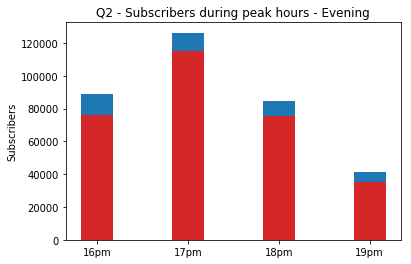

In [19]:
N = 4
# Append pm to all the hours
hours = evening_subscribers[evening_subscribers['subscriber_type'] == 'Subscriber']['start_hour'].astype(str) + 'pm'
subscribers = evening_subscribers[evening_subscribers['subscriber_type'] == 'Subscriber']['num']
customers = evening_subscribers[evening_subscribers['subscriber_type'] == 'Customer']['num']
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, subscribers, width, color='#d62728')
p2 = plt.bar(ind, customers, width,
             bottom=subscribers)

plt.ylabel('Subscribers')
plt.title('Q2 - Subscribers during peak hours - Evening')
plt.xticks(ind, hours)

plt.show()

## Answer ##
As can be seen by the bar charts, there are considerably more subscribers than customers during the peak hours of 7-10am and 4-7pm.

# Question 3: What is the average trip duration for commuters identified in Questioni 2? #

## Morning ##

In [20]:
! bq query --use_legacy_sql=FALSE 'SELECT \
  FORMAT("%.2F", AVG(duration_sec)/60) trip_duration \
FROM \
  `bigquery-public-data.san_francisco.bikeshare_trips` \
WHERE \
  CAST( FORMAT_TIMESTAMP("%H", \
      start_date) AS INT64) BETWEEN 7 AND 10 \
  AND LOWER(subscriber_type) = "subscriber" \
'

Waiting on bqjob_r4cee706a54937184_00000161b245e0ea_1 ... (0s) Current status: DONE   
+---------------+
| trip_duration |
+---------------+
| 9.52          |
+---------------+


In [27]:
! bq query --use_legacy_sql=FALSE --format=csv --max_rows=400000 'SELECT \
  duration_sec/60 trip_duration \
FROM \
  `bigquery-public-data.san_francisco.bikeshare_trips` \
WHERE \
  CAST( FORMAT_TIMESTAMP("%H", \
      start_date) AS INT64) BETWEEN 7 AND 10 \
  AND LOWER(subscriber_type) = "subscriber" \
  ORDER by trip_duration' > q3_morning.csv

Waiting on bqjob_r45b1b7f65f1e9b14_00000161b7d306d0_1 ... (2s) Current status: DONE   

In [28]:
trip_durations_morning=pd.read_csv('q3_morning.csv')
trip_durations_morning.shape

(316195, 1)

In [51]:
trip_durations_morning.head()

,trip_duration
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0


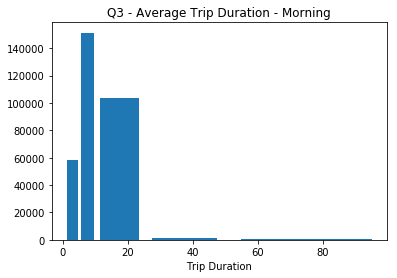

In [55]:
bins = [1, 5, 10, 25, 50, 100]
hist = plt.hist(trip_durations_morning['trip_duration'], bins, histtype='bar', rwidth=0.8)

plt.xlabel('Trip Duration')
plt.title('Q3 - Average Trip Duration - Morning')

plt.show()

In [23]:
np.average(morning_trip_durations)

9.520780594253544

## Evening ##

In [24]:
! bq query --use_legacy_sql=FALSE 'SELECT \
  FORMAT("%.2F", AVG(duration_sec)/60) trip_duration \
FROM \
  `bigquery-public-data.san_francisco.bikeshare_trips` \
WHERE \
  CAST( FORMAT_TIMESTAMP("%H", \
      start_date) AS INT64) BETWEEN 16 AND 19 \
  AND LOWER(subscriber_type) = "subscriber" \
'

Waiting on bqjob_r55898283642fdfe6_00000161b24617c3_1 ... (0s) Current status: DONE   
+---------------+
| trip_duration |
+---------------+
| 9.84          |
+---------------+


In [45]:
! bq query --use_legacy_sql=FALSE --format=csv --max_rows=400000 'SELECT \
  duration_sec/60 trip_duration \
FROM \
  `bigquery-public-data.san_francisco.bikeshare_trips` \
WHERE \
  CAST( FORMAT_TIMESTAMP("%H", \
      start_date) AS INT64) BETWEEN 16 AND 19 \
  AND LOWER(subscriber_type) = "subscriber" \
  ORDER by trip_duration' > q3_evening.csv

Waiting on bqjob_r2ce5bd2c6c83d8dd_00000161b7da9d7a_1 ... (1s) Current status: DONE   

In [46]:
evening_trip_durations=pd.read_csv('q3_evening.csv')
evening_trip_durations.shape

(302279, 1)

In [50]:
evening_trip_durations.head()

,trip_duration
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0


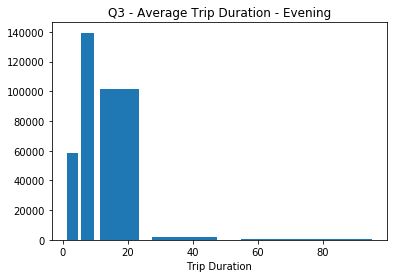

In [54]:
bins = [1, 5, 10, 25, 50, 100]
hist = plt.hist(evening_trip_durations['trip_duration'], bins, histtype='bar', rwidth=0.8)

plt.xlabel('Trip Duration')
plt.title('Q3 - Average Trip Duration - Evening')

plt.show()

In [27]:
np.average(evening_trip_durations)

9.842140241300257

## Answer ##

* Morning: 9.52 minutes
* Evening: 9.84 minutes

# Question 4: What are the 5 most popular trips taken by the commuters identified in Question 2 by time of the day (morning vs evening)? #

## Morning ##

In [28]:
! bq query --use_legacy_sql=FALSE 'SELECT \
  start_station_name, \
  end_station_name, \
  COUNT(*) num \
FROM \
  `bigquery-public-data.san_francisco.bikeshare_trips` \
WHERE \
  CAST( FORMAT_TIMESTAMP("%H", \
      start_date) AS INT64) BETWEEN 7 AND 10 \
  AND LOWER(subscriber_type) = "subscriber" \
GROUP BY \
  start_station_name, \
  end_station_name \
ORDER BY \
  num DESC \
LIMIT \
  5 \
'

Waiting on bqjob_r61fd723cf281f1c8_00000161b24648f3_1 ... (0s) Current status: DONE   
+------------------------------------------+-----------------------------------------------+------+
|            start_station_name            |               end_station_name                | num  |
+------------------------------------------+-----------------------------------------------+------+
| Harry Bridges Plaza (Ferry Building)     | 2nd at Townsend                               | 4605 |
| San Francisco Caltrain 2 (330 Townsend)  | Townsend at 7th                               | 4103 |
| Steuart at Market                        | 2nd at Townsend                               | 4048 |
| San Francisco Caltrain (Townsend at 4th) | Temporary Transbay Terminal (Howard at Beale) | 3581 |
| San Francisco Caltrain (Townsend at 4th) | Embarcadero at Folsom                         | 3443 |
+------------------------------------------+-----------------------------------------------+------+


In [29]:
! bq query --use_legacy_sql=FALSE --format=csv 'SELECT \
  start_station_name, \
  end_station_name, \
  COUNT(*) num \
FROM \
  `bigquery-public-data.san_francisco.bikeshare_trips` \
WHERE \
  CAST( FORMAT_TIMESTAMP("%H", \
      start_date) AS INT64) BETWEEN 7 AND 10 \
  AND LOWER(subscriber_type) = "subscriber" \
GROUP BY \
  start_station_name, \
  end_station_name \
ORDER BY \
  num DESC \
LIMIT 25 \
' > q4_morning.csv

Waiting on bqjob_r5173225762ff68c0_00000161b24653f9_1 ... (0s) Current status: DONE   

In [30]:
morning_popular_trips=pd.read_csv('q4_morning.csv')
morning_popular_trips.shape

(25, 3)

In [31]:
morning_popular_trips

,start_station_name,end_station_name,num
0,Harry Bridges Plaza (Ferry Building),2nd at Townsend,4605
1,San Francisco Caltrain 2 (330 Townsend),Townsend at 7th,4103
2,Steuart at Market,2nd at Townsend,4048
3,San Francisco Caltrain (Townsend at 4th),Temporary Transbay Terminal (Howard at Beale),3581
4,San Francisco Caltrain (Townsend at 4th),Embarcadero at Folsom,3443
5,Market at Sansome,2nd at South Park,3402
6,Harry Bridges Plaza (Ferry Building),Embarcadero at Sansome,3120
7,San Francisco Caltrain (Townsend at 4th),Harry Bridges Plaza (Ferry Building),3084
8,Steuart at Market,Embarcadero at Sansome,3002
9,San Francisco Caltrain (Townsend at 4th),Steuart at Market,2981


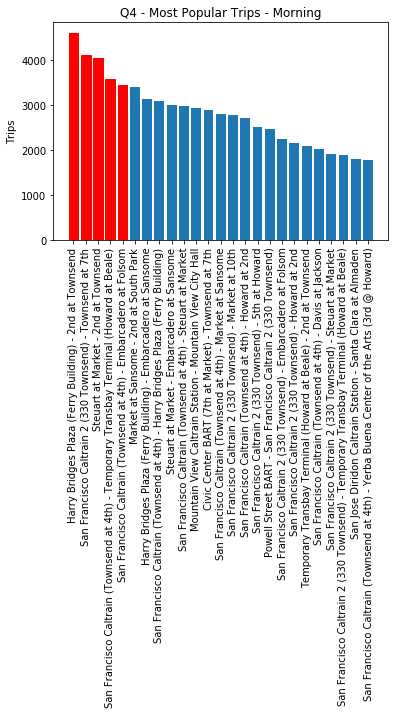

In [32]:
N = 25
# Append pm to all the hours
trip_stations = morning_popular_trips['start_station_name'] + ' - ' + morning_popular_trips['end_station_name']
trip_nums = morning_popular_trips['num']
ind = np.arange(N)    # the x locations for the groups

p1 = plt.bar(ind, trip_nums)

# Change color for the peak hours
p1[0].set_color('r')
p1[1].set_color('r')
p1[2].set_color('r')
p1[3].set_color('r')
p1[4].set_color('r')

plt.ylabel('Trips')
plt.title('Q4 - Most Popular Trips - Morning')
plt.xticks(ind, trip_stations, rotation='vertical')

plt.show()

## Evening ##

In [33]:
! bq query --use_legacy_sql=FALSE 'SELECT \
  start_station_name, \
  end_station_name, \
  COUNT(*) num \
FROM \
  `bigquery-public-data.san_francisco.bikeshare_trips` \
WHERE \
  CAST( FORMAT_TIMESTAMP("%H", \
      start_date) AS INT64) BETWEEN 16 AND 19 \
  AND LOWER(subscriber_type) = "subscriber" \
GROUP BY \
  start_station_name, \
  end_station_name \
ORDER BY \
  num DESC \
LIMIT \
  5'

Waiting on bqjob_r2ed2c4a0f1b6e34f_00000161b2465f64_1 ... (0s) Current status: DONE   
+------------------------+------------------------------------------+------+
|   start_station_name   |             end_station_name             | num  |
+------------------------+------------------------------------------+------+
| 2nd at Townsend        | Harry Bridges Plaza (Ferry Building)     | 4268 |
| Embarcadero at Folsom  | San Francisco Caltrain (Townsend at 4th) | 4088 |
| Embarcadero at Sansome | Steuart at Market                        | 4009 |
| 2nd at South Park      | Market at Sansome                        | 3510 |
| Steuart at Market      | San Francisco Caltrain (Townsend at 4th) | 3469 |
+------------------------+------------------------------------------+------+


In [34]:
! bq query --use_legacy_sql=FALSE --format=csv 'SELECT \
  start_station_name, \
  end_station_name, \
  COUNT(*) num \
FROM \
  `bigquery-public-data.san_francisco.bikeshare_trips` \
WHERE \
  CAST( FORMAT_TIMESTAMP("%H", \
      start_date) AS INT64) BETWEEN 16 AND 19 \
  AND LOWER(subscriber_type) = "subscriber" \
GROUP BY \
  start_station_name, \
  end_station_name \
ORDER BY \
  num DESC \
LIMIT 25 \
' > q4_evening.csv

Waiting on bqjob_r5b4749be6cf500e1_00000161b24669a5_1 ... (0s) Current status: DONE   

In [35]:
evening_popular_trips=pd.read_csv('q4_evening.csv')
evening_popular_trips.shape

(25, 3)

In [36]:
evening_popular_trips

,start_station_name,end_station_name,num
0,2nd at Townsend,Harry Bridges Plaza (Ferry Building),4268
1,Embarcadero at Folsom,San Francisco Caltrain (Townsend at 4th),4088
2,Embarcadero at Sansome,Steuart at Market,4009
3,2nd at South Park,Market at Sansome,3510
4,Steuart at Market,San Francisco Caltrain (Townsend at 4th),3469
5,Market at 10th,San Francisco Caltrain 2 (330 Townsend),3468
6,Temporary Transbay Terminal (Howard at Beale),San Francisco Caltrain (Townsend at 4th),3394
7,Townsend at 7th,San Francisco Caltrain 2 (330 Townsend),3255
8,Howard at 2nd,San Francisco Caltrain (Townsend at 4th),2860
9,Townsend at 7th,Civic Center BART (7th at Market),2601


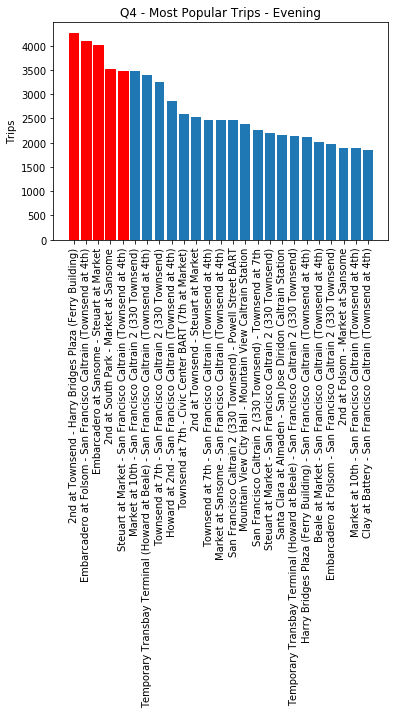

In [37]:
N = 25
# Append pm to all the hours
trip_stations = evening_popular_trips['start_station_name'] + ' - ' + evening_popular_trips['end_station_name']
trip_nums = evening_popular_trips['num']
ind = np.arange(N)    # the x locations for the groups

p1 = plt.bar(ind, trip_nums)

# Change color for the peak hours
p1[0].set_color('r')
p1[1].set_color('r')
p1[2].set_color('r')
p1[3].set_color('r')
p1[4].set_color('r')

plt.ylabel('Trips')
plt.title('Q4 - Most Popular Trips - Evening')
plt.xticks(ind, trip_stations, rotation='vertical')

plt.show()

## Answer ##

5 most popular trips taken by commtuters are as below:

### Morning ###
* Harry Bridges Plaza (Ferry Building) - 2nd at Townsend
* San Francisco Caltrain 2 (330 Townsend) - Townsend at 7th
* Steuart at Market - 2nd at Townsend
* San Francisco Caltrain (Townsend at 4th) - Temporary Transbay Terminal (Howard at Beale)
* San Francisco Caltrain (Townsend at 4th) - Embarcadero at Folsom

### Evening ###
* 2nd at Townsend - Harry Bridges Plaza (Ferry Building)
* Embarcadero at Folsom - San Francisco Caltrain (Townsend at 4th)
* Embarcadero at Sansome - Steuart at Market
* 2nd at South Park - Market at Sansome
* Steuart at Market - San Francisco Caltrain (Townsend at 4th)

# Question 5: What is the average trip duration for non-commuters? #

In [1]:
! bq query --use_legacy_sql=FALSE 'SELECT \
  FORMAT("%.2F", AVG(duration_sec)/60) trip_duration \
FROM \
  `bigquery-public-data.san_francisco.bikeshare_trips` \
WHERE \
  LOWER(subscriber_type) != "subscriber" \
  OR (CAST( FORMAT_TIMESTAMP("%H", start_date) AS INT64) NOT BETWEEN 7 \
    AND 9 \
    AND CAST( FORMAT_TIMESTAMP("%H", start_date) AS INT64) NOT BETWEEN 16 \
    AND 18 \
    AND subscriber_type = "subscriber" ) \
'

Waiting on bqjob_r52dc3e39800f9c4b_00000161b247d4d1_1 ... (0s) Current status: DONE   
+---------------+
| trip_duration |
+---------------+
| 61.98         |
+---------------+


In [2]:
! bq query --use_legacy_sql=FALSE --format=csv --max_rows=150000 'SELECT \
  FORMAT("%.2F", duration_sec/60) trip_duration \
FROM \
  `bigquery-public-data.san_francisco.bikeshare_trips` \
WHERE \
  LOWER(subscriber_type) != "subscriber" \
  OR (CAST( FORMAT_TIMESTAMP("%H", start_date) AS INT64) NOT BETWEEN 7 \
    AND 9 \
    AND CAST( FORMAT_TIMESTAMP("%H", start_date) AS INT64) NOT BETWEEN 16 \
    AND 18 \
    AND subscriber_type = "subscriber" ) \
' > q5.csv

Waiting on bqjob_r5cdf3ad50815f8e4_00000161b2483d23_1 ... (0s) Current status: DONE   

In [5]:
trip_duration_non_commuters=pd.read_csv('q5.csv')
trip_duration_non_commuters.shape

(136809, 1)

In [6]:
trip_duration_non_commuters.head()

,trip_duration
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0


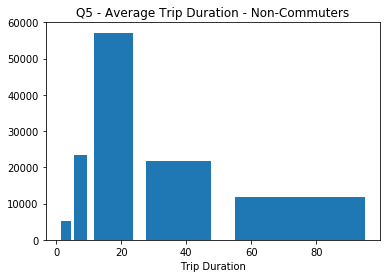

In [60]:
bins = [1, 5, 10, 25, 50, 100]
hist = plt.hist(trip_duration_non_commuters['trip_duration'], bins, histtype='bar', rwidth=0.8)

plt.xlabel('Trip Duration')
plt.title('Q5 - Average Trip Duration - Non-Commuters')

plt.show()

In [7]:
np.average(trip_duration_non_commuters)

61.979755133068736

## Answer ##

The average trip duration for non-commuters is 61.98 minutes.

# Question 6: What are the 5 most popular trips taken by non-commuters? #

In [ ]:
! bq query --use_legacy_sql=FALSE 'SELECT \
  start_station_name, \
  end_station_name, \
  COUNT(*) num \
FROM \
  `bigquery-public-data.san_francisco.bikeshare_trips` \
WHERE \
  LOWER(subscriber_type) != "subscriber" \
  OR (CAST( FORMAT_TIMESTAMP("%H", start_date) AS INT64) NOT BETWEEN 7 \
    AND 9 \
    AND CAST( FORMAT_TIMESTAMP("%H", start_date) AS INT64) NOT BETWEEN 16 \
    AND 18 \
    AND subscriber_type = "subscriber" ) \
GROUP BY \
  start_station_name, \
  end_station_name \
ORDER BY \
  num DESC \
LIMIT \
  5 \
'

In [11]:
! bq query --use_legacy_sql=FALSE --format=csv 'SELECT \
  start_station_name, \
  end_station_name, \
  COUNT(*) num \
FROM \
  `bigquery-public-data.san_francisco.bikeshare_trips` \
WHERE \
  LOWER(subscriber_type) != "subscriber" \
  OR (CAST( FORMAT_TIMESTAMP("%H", start_date) AS INT64) NOT BETWEEN 7 \
    AND 9 \
    AND CAST( FORMAT_TIMESTAMP("%H", start_date) AS INT64) NOT BETWEEN 16 \
    AND 18 \
    AND subscriber_type = "subscriber" ) \
GROUP BY \
  start_station_name, \
  end_station_name \
ORDER BY \
  num DESC \
LIMIT \
  25 \
' > q6.csv

Waiting on bqjob_r760ff077ad09aa19_00000161b24d366c_1 ... (0s) Current status: DONE   

In [12]:
most_popular_trips_non_commuters=pd.read_csv('q6.csv')
most_popular_trips_non_commuters.shape

(25, 3)

In [13]:
most_popular_trips_non_commuters

,start_station_name,end_station_name,num
0,Harry Bridges Plaza (Ferry Building),Embarcadero at Sansome,3667
1,Embarcadero at Sansome,Embarcadero at Sansome,2545
2,Harry Bridges Plaza (Ferry Building),Harry Bridges Plaza (Ferry Building),2004
3,Embarcadero at Sansome,Harry Bridges Plaza (Ferry Building),1638
4,Embarcadero at Vallejo,Embarcadero at Sansome,1345
5,University and Emerson,University and Emerson,1113
6,Harry Bridges Plaza (Ferry Building),Embarcadero at Vallejo,868
7,Steuart at Market,Embarcadero at Sansome,847
8,Market at 4th,Market at 4th,811
9,Market at 4th,Embarcadero at Sansome,770


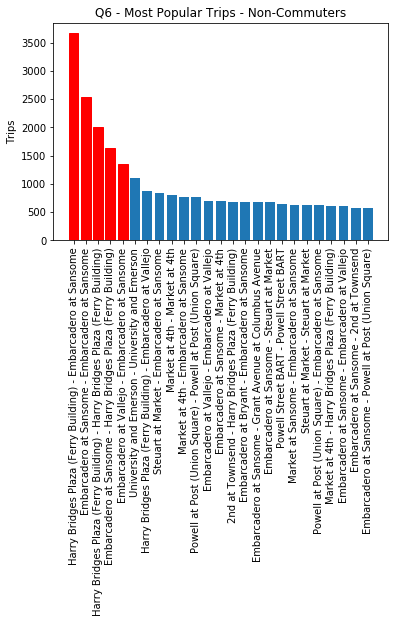

In [14]:
N = 25
# Append pm to all the hours
trip_stations = most_popular_trips_non_commuters['start_station_name'] + ' - ' + most_popular_trips_non_commuters['end_station_name']
trip_nums = most_popular_trips_non_commuters['num']
ind = np.arange(N)    # the x locations for the groups

p1 = plt.bar(ind, trip_nums)

# Change color for the peak hours
p1[0].set_color('r')
p1[1].set_color('r')
p1[2].set_color('r')
p1[3].set_color('r')
p1[4].set_color('r')

plt.ylabel('Trips')
plt.title('Q6 - Most Popular Trips - Non-Commuters')
plt.xticks(ind, trip_stations, rotation='vertical')

plt.show()

## Answer ##

5 popular trips taken by non-commuters are as below:

* Harry Bridges Plaza (Ferry Building) - Embarcadero at Sansome
* Embarcadero at Sansome - Embarcadero at Sansome
* Harry Bridges Plaza (Ferry Building) - Harry Bridges Plaza (Ferry Building)
* Embarcadero at Sansome - Harry Bridges Plaza (Ferry Building)
* Embarcadero at Vallejo - Embarcadero at Sansome